In [24]:
!pip install folium

In [25]:
!pip install scikit-learn

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd
import zipfile
import os
from sklearn.preprocessing import LabelEncoder
import seaborn as sb
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
# Download NLTK data (only need to do this once)
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\מיכאל\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\מיכאל\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
# Load the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\מיכאל\Desktop\air bnb germany project\AirbnbBerlin.csv", encoding='latin1',low_memory=False)
df.head()

,index,Review ID,review_date,Reviewer ID,Reviewer Name,Comments,Listing ID,Listing URL,Listing Name,Host ID,...,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready
0,0,58660447.0,01/03/2016,14876562.0,Dennis,"Very nice, clean appartement! Josh was really ...",10002699,https://www.airbnb.com/rooms/10002699,Trendy and peaceful KreuzkÃÂ¶lln,44696672,...,01/03/2016,100.0,8.0,10.0,6.0,10.0,10.0,10.0,f,f
1,1,NaN,NaN,NaN,NaN,NaN,10002922,https://www.airbnb.com/rooms/10002922,Sehr zentrale Wohnung in Berlin,45848709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f
2,2,58663795.0,01/03/2016,49367757.0,Andreea,Aki is really nice and friendly. We had an ama...,10006647,https://www.airbnb.com/rooms/10006647,Very central and very quite,40791092,...,02/12/2017,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,f
3,3,59003619.0,01/05/2016,46694292.0,Sasha,Aki is a very nice dude with a clean place in ...,10006647,https://www.airbnb.com/rooms/10006647,Very central and very quite,40791092,...,02/12/2017,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,f
4,4,66845661.0,03-25-16,54542819.0,Yohana,Aki's place was easy to find and located in th...,10006647,https://www.airbnb.com/rooms/10006647,Very central and very quite,40791092,...,02/12/2017,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,f


In [28]:
numeric_columns = df.select_dtypes(include='number').columns
# Calculate and export maximum values
df[numeric_columns].max().to_csv(r"C:\Users\מיכאל\Desktop\air bnb germany project\MAX_AirbnbBerlin.csv", index=True)
# Calculate and export minimum values
df[numeric_columns].min().to_csv(r"C:\Users\מיכאל\Desktop\air bnb germany project\MIN_AirbnbBerlin.csv", index=True)
# Calculate and export count of missing values
df.isnull().sum(axis=0).to_csv(r"C:\Users\מיכאל\Desktop\air bnb germany project\NA_AirbnbBerlin.csv", index=True)
# Calculate and export count of unique values
df[numeric_columns].nunique().to_csv(r"C:\Users\מיכאל\Desktop\air bnb germany project\UNIQUE_AirbnbBerlin.csv", index=True)
print("save success")

save success


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456961 entries, 0 to 456960
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  456961 non-null  int64  
 1   Review ID              452805 non-null  float64
 2   review_date            452805 non-null  object 
 3   Reviewer ID            452805 non-null  float64
 4   Reviewer Name          452805 non-null  object 
 5   Comments               452595 non-null  object 
 6   Listing ID             456961 non-null  int64  
 7   Listing URL            456961 non-null  object 
 8   Listing Name           456756 non-null  object 
 9   Host ID                456961 non-null  int64  
 10  Host URL               456961 non-null  object 
 11  Host Name              456913 non-null  object 
 12  Host Since             456913 non-null  object 
 13  Host Response Time     398194 non-null  object 
 14  Host Response Rate     398194 non-nu

In [30]:
df.describe()

,index,Review ID,Reviewer ID,Listing ID,Host ID,Latitude,Longitude,Accomodates,Bathrooms,Bedrooms,...,Guests Included,Min Nights,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating
count,456961.000000,4.528050e+05,4.528050e+05,4.569610e+05,4.569610e+05,456961.000000,456961.000000,456961.000000,456018.000000,456244.000000,...,456961.000000,456961.000000,456961.000000,452242.000000,452209.000000,452211.000000,452188.000000,452205.000000,452186.000000,452185.000000
mean,228480.000000,2.210771e+08,6.741881e+07,1.172870e+07,4.225116e+07,52.512460,13.403450,3.102133,1.099039,1.216042,...,1.571178,4.945792,102.961113,94.569752,9.769029,9.502785,9.805570,9.806583,9.639045,9.426746
std,131913.422517,1.298566e+08,6.445677e+07,9.105569e+06,5.475489e+07,0.028892,0.055173,1.928835,0.337697,0.720500,...,1.076073,16.146465,96.637273,4.399786,0.473212,0.682148,0.438024,0.442631,0.528235,0.576970
min,0.000000,4.283000e+03,5.000000e+00,2.695000e+03,1.581000e+03,52.345800,13.097180,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,114240.000000,1.084257e+08,1.570784e+07,3.187735e+06,4.097958e+06,52.493450,13.376740,2.000000,1.000000,1.000000,...,1.000000,1.000000,28.000000,92.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,228480.000000,2.204285e+08,4.332366e+07,1.080061e+07,1.860098e+07,52.512880,13.411990,2.000000,1.000000,1.000000,...,1.000000,2.000000,75.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,342720.000000,3.276229e+08,1.060161e+08,1.873384e+07,5.751183e+07,52.532390,13.434080,4.000000,1.000000,1.000000,...,2.000000,3.000000,149.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,456960.000000,4.528262e+08,2.614011e+08,3.468232e+07,2.616142e+08,52.651670,13.757640,16.000000,8.500000,10.000000,...,16.000000,1000.000000,545.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [31]:
# from autoviz.AutoViz_Class import AutoViz_Class
# %matplotlib inline

# AV = AutoViz_Class()
# AV.AutoViz('C:\Users\מיכאל\Desktop\air bnb germany project\AirbnbBerlin.csv')

In [32]:
#get the type of all columns of dataframe and divided to 3 categories - numeric , category , boolean
def get_column_types(df):
    numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
    object_columns = df.select_dtypes(include=['object']).columns.tolist()
    bool_columns = df.select_dtypes(include=['bool']).columns.tolist()
    return numeric_columns, object_columns , bool_columns


numeric_columns, object_columns , bool_columns = get_column_types(df)
print("# numeric_columns \n")
print(numeric_columns)
print("\n #object_columns \n")
print(object_columns)
print("\n #boolian_columns \n")
print(bool_columns)

# numeric_columns 

['index', 'Review ID', 'Reviewer ID', 'Listing ID', 'Host ID', 'Latitude', 'Longitude', 'Accomodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Square Feet', 'Guests Included', 'Min Nights', 'Reviews', 'Overall Rating', 'Accuracy Rating', 'Cleanliness Rating', 'Checkin Rating', 'Communication Rating', 'Location Rating', 'Value Rating']

 #object_columns 

['review_date', 'Reviewer Name', 'Comments', 'Listing URL', 'Listing Name', 'Host URL', 'Host Name', 'Host Since', 'Host Response Time', 'Host Response Rate', 'Is Superhost', 'neighbourhood', 'Neighborhood Group', 'City', 'Postal Code', 'Country Code', 'Country', 'Is Exact Location', 'Property Type', 'Room Type', 'Price', 'First Review', 'Last Review', 'Instant Bookable', 'Business Travel Ready']

 #boolian_columns 

[]


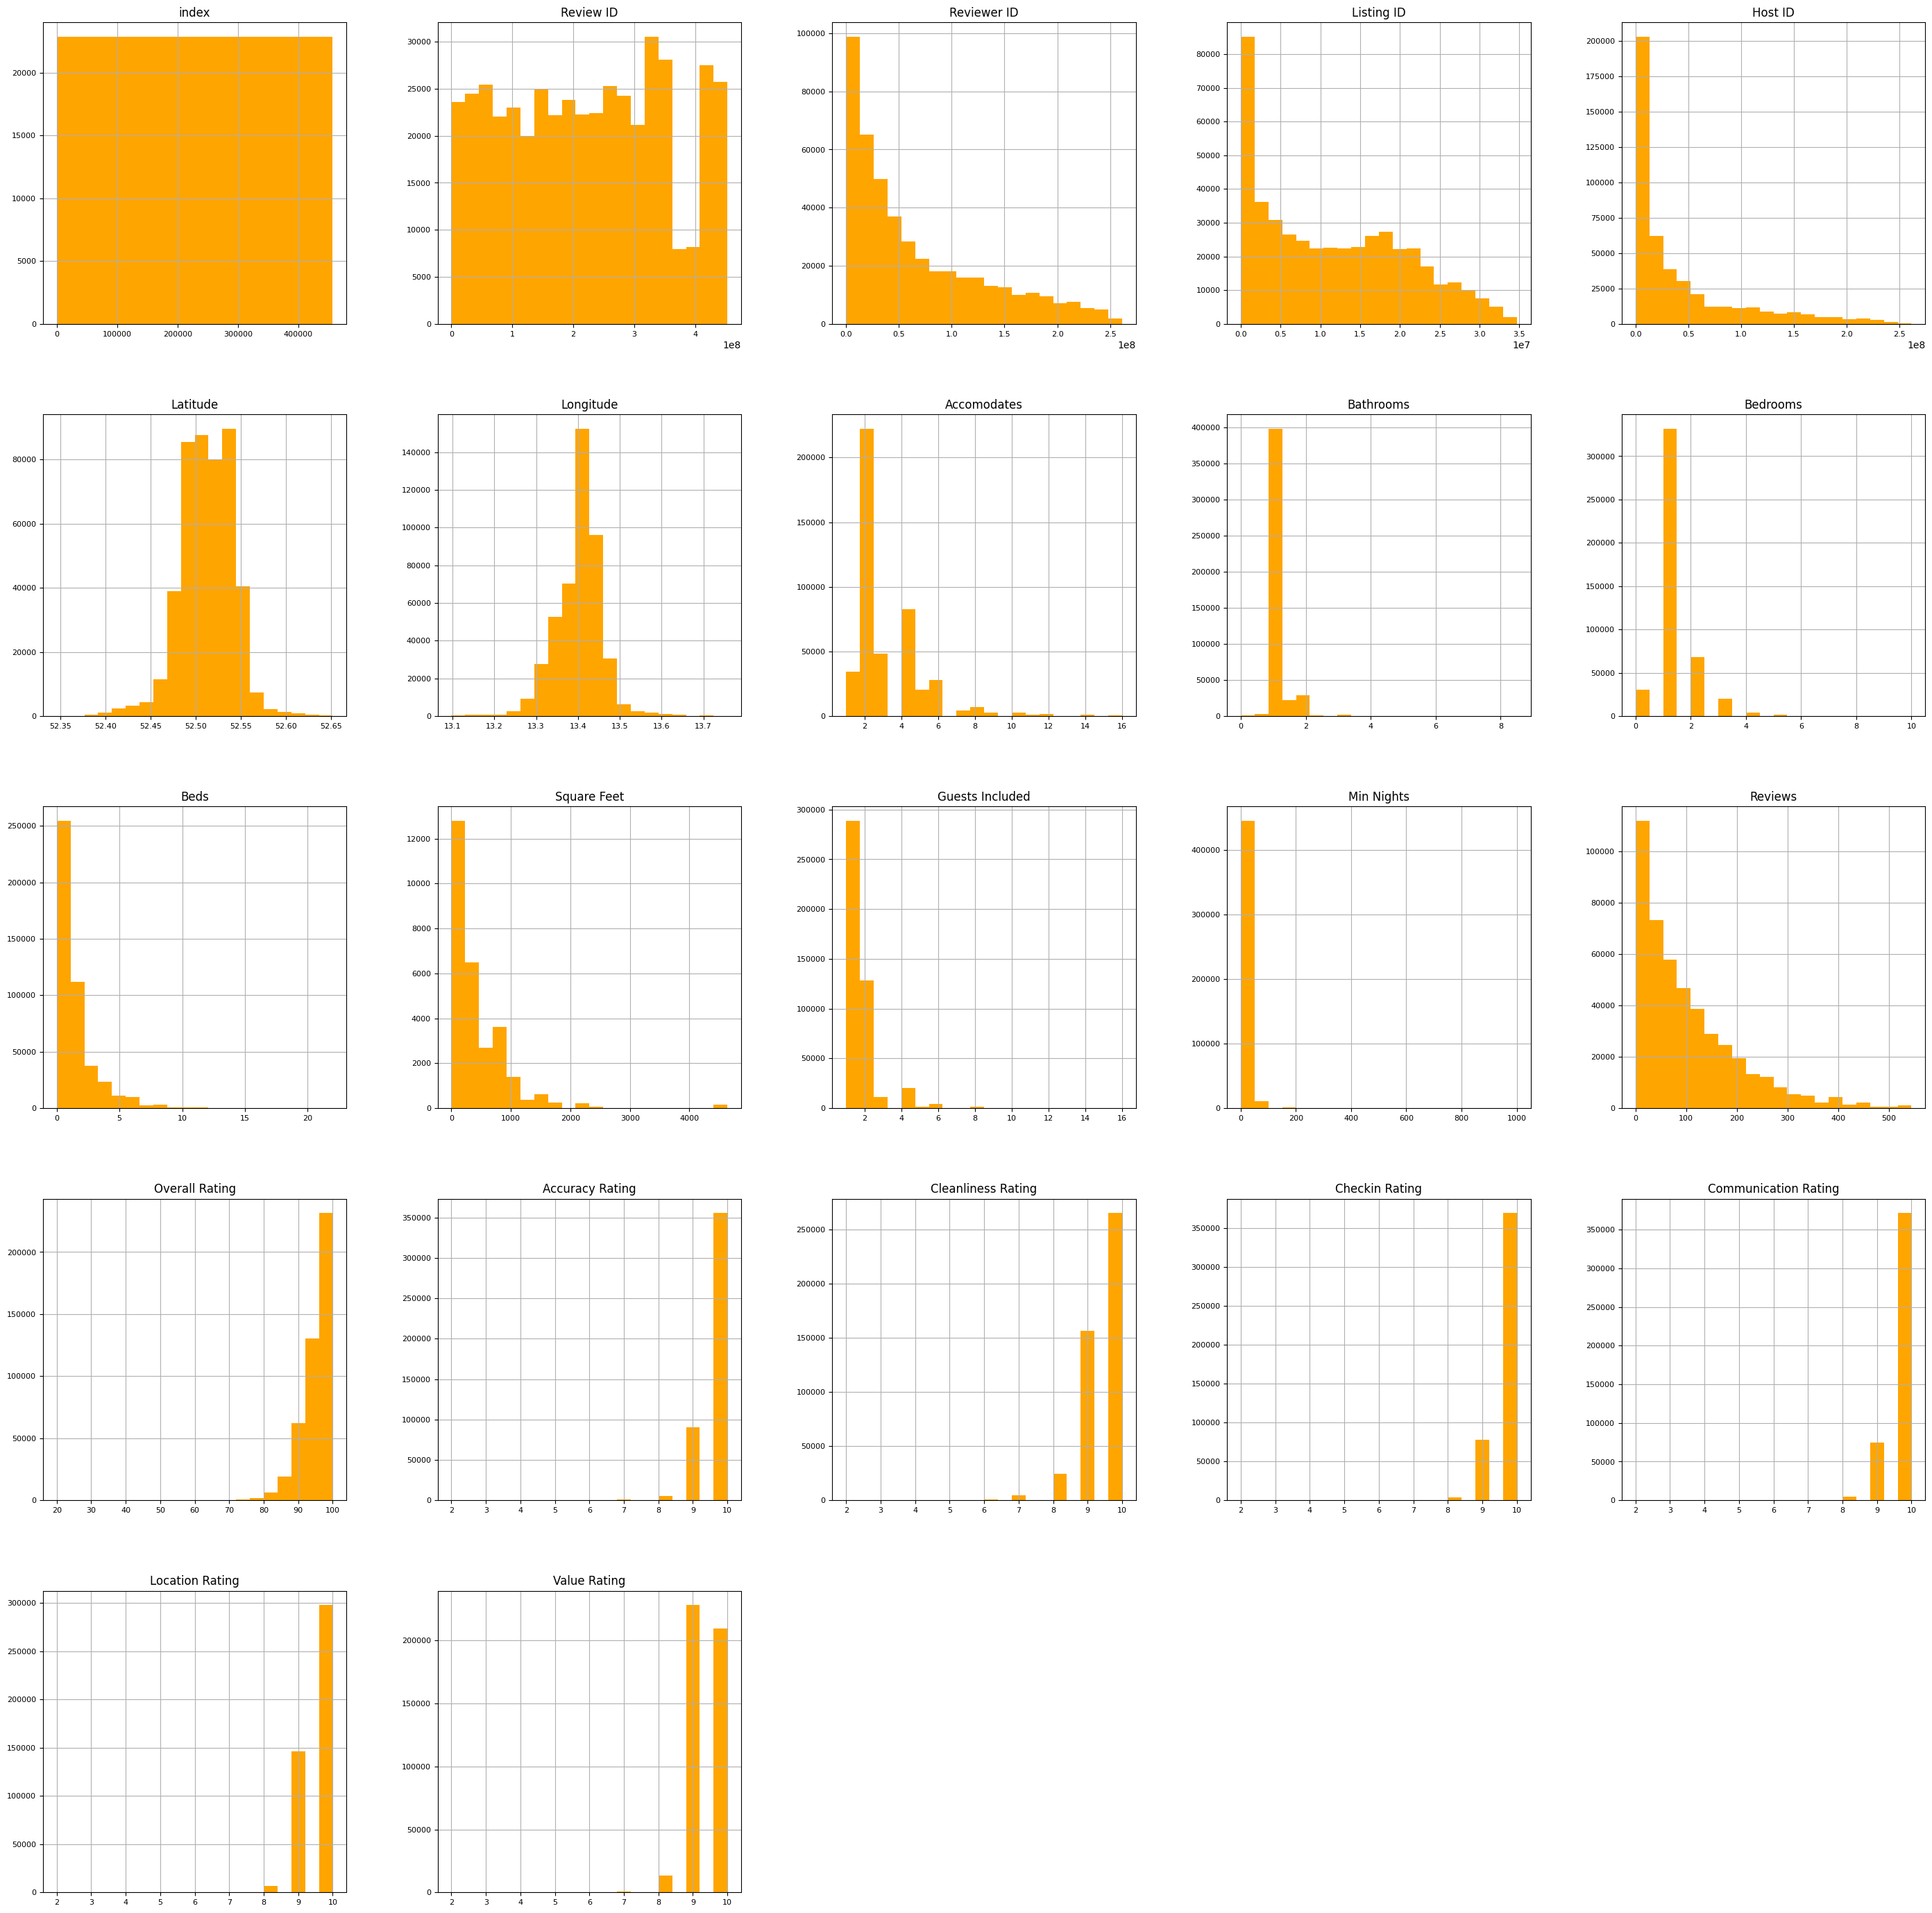

In [33]:
#show hostogram to continus columns
con_df = df[numeric_columns]
con_df.hist(figsize=(35, 35), bins=20, xlabelsize=8, ylabelsize=8, color = "orange");

In [34]:
# Function to apply background color based on skewness
def highlight(cell_value):
    if cell_value > 1:
        return 'background-color: mediumspringgreen;'
    elif cell_value < -1:
        return 'background-color: hotpink;'
    else:
        return ''

# Calculate skewness and apply highlighting
styled_df = pd.DataFrame(con_df.skew(), columns=['Skewness']).sort_values(by='Skewness', ascending=False).style.applymap(highlight)

# Display styled DataFrame
styled_df

C:\Users\מיכאל\AppData\Local\Temp\ipykernel_536\2749053774.py:11: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = pd.DataFrame(con_df.skew(), columns=['Skewness']).sort_values(by='Skewness', ascending=False).style.applymap(highlight)


,Skewness
Min Nights,16.746260
Bathrooms,4.950286
Guests Included,3.887430
Square Feet,3.512388
Beds,2.832591
Accomodates,2.289824
Bedrooms,2.165250
Host ID,1.690028
Reviews,1.441297
Reviewer ID,1.049859


In [35]:
# find uniqueness of object columns
unique_values = {col: df[col].nunique() for col in object_columns}

# Display the number of unique values for each object column
print("\nNumber of unique values in each object column:")
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count}")


Number of unique values in each object column:
review_date: 3000
Reviewer Name: 57372
Comments: 437539
Listing URL: 23536
Listing Name: 22837
Host URL: 19772
Host Name: 6184
Host Since: 3085
Host Response Time: 4
Host Response Rate: 75
Is Superhost: 2
neighbourhood: 93
Neighborhood Group: 12
City: 59
Postal Code: 213
Country Code: 3
Country: 3
Is Exact Location: 2
Property Type: 35
Room Type: 3
Price: 326
First Review: 2382
Last Review: 1464
Instant Bookable: 2
Business Travel Ready: 1


In [36]:
# Columns to remove because too much unique or contain 1 value in colum
columns_to_remove = [
    'review_date', 'Reviewer Name', 'Listing URL', 'Listing Name',
     'Host Name' , 'Review ID' , 'Listing ID' , 'Host URL' , 'Reviewer ID' , 'Host ID'  , 'First Review','Last Review'
    , 'Business Travel Ready'
]

# Remove the specified columns
df_reduce = df.drop(columns=columns_to_remove)


In [37]:
df_reduce.head()

,index,Comments,Host Since,Host Response Time,Host Response Rate,Is Superhost,neighbourhood,Neighborhood Group,City,Postal Code,...,Min Nights,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable
0,0,"Very nice, clean appartement! Josh was really ...",09-20-15,NaN,NaN,f,NeukÃÂ¶lln,NeukÃÂ¶lln,Berlin,12047,...,1,1,100.0,8.0,10.0,6.0,10.0,10.0,10.0,f
1,1,NaN,10/05/2015,NaN,NaN,f,Prenzlauer Berg,Pankow,Berlin,10405,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
2,2,Aki is really nice and friendly. We had an ama...,08/07/2015,within a few hours,100%,f,Mitte,Mitte,Berlin,10178,...,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f
3,3,Aki is a very nice dude with a clean place in ...,08/07/2015,within a few hours,100%,f,Mitte,Mitte,Berlin,10178,...,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f
4,4,Aki's place was easy to find and located in th...,08/07/2015,within a few hours,100%,f,Mitte,Mitte,Berlin,10178,...,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f


C:\Users\מיכאל\AppData\Local\Temp\ipykernel_536\2092282185.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Count', data=value_counts, palette='viridis')


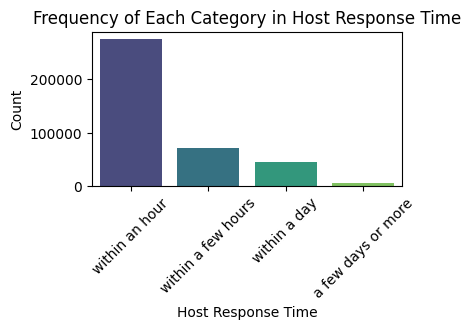

C:\Users\מיכאל\AppData\Local\Temp\ipykernel_536\2092282185.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Count', data=value_counts, palette='viridis')


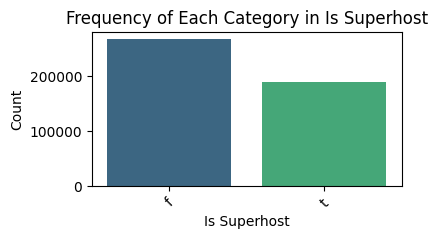

C:\Users\מיכאל\AppData\Local\Temp\ipykernel_536\2092282185.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Count', data=value_counts, palette='viridis')
C:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


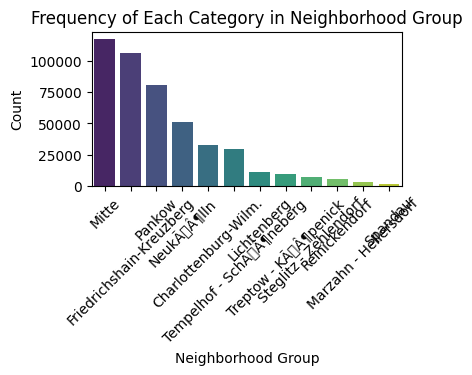

C:\Users\מיכאל\AppData\Local\Temp\ipykernel_536\2092282185.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Count', data=value_counts, palette='viridis')


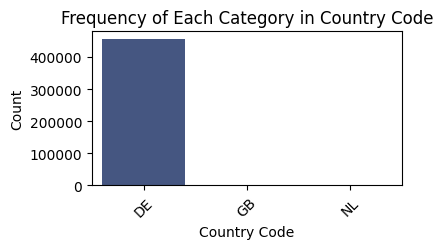

C:\Users\מיכאל\AppData\Local\Temp\ipykernel_536\2092282185.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Count', data=value_counts, palette='viridis')


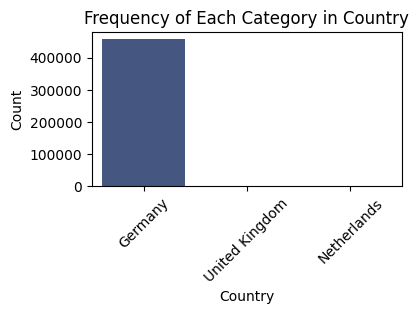

C:\Users\מיכאל\AppData\Local\Temp\ipykernel_536\2092282185.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Count', data=value_counts, palette='viridis')


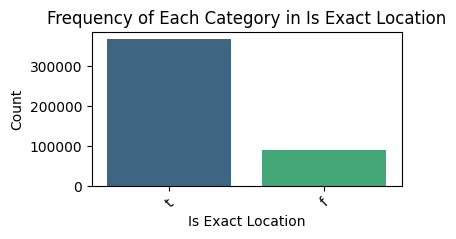

C:\Users\מיכאל\AppData\Local\Temp\ipykernel_536\2092282185.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Count', data=value_counts, palette='viridis')


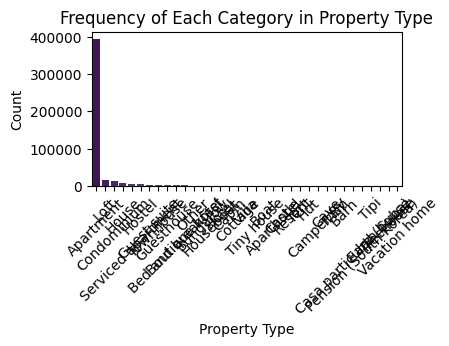

C:\Users\מיכאל\AppData\Local\Temp\ipykernel_536\2092282185.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Count', data=value_counts, palette='viridis')


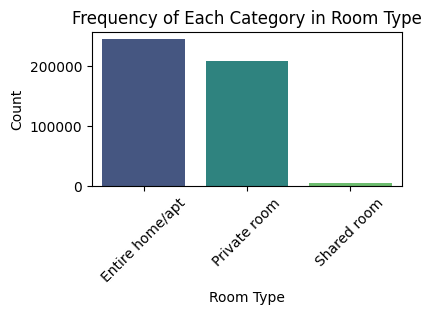

C:\Users\מיכאל\AppData\Local\Temp\ipykernel_536\2092282185.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Count', data=value_counts, palette='viridis')


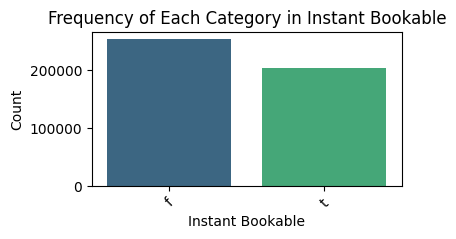

In [38]:
# Maximum number of unique values to display
max_unique_values = 40

# List of categorical columns
categorical_columns = df_reduce.select_dtypes(include='object').columns

# Filter columns to include only those with 40 or fewer unique values
filtered_columns = [col for col in categorical_columns if df_reduce[col].nunique() <= max_unique_values]

# Create separate bar plots for each filtered categorical column
for column in filtered_columns:
    plt.figure(figsize=(4, 2))
    value_counts = df_reduce[column].value_counts().reset_index()
    value_counts.columns = [column, 'Count']
    sns.barplot(x=column, y='Count', data=value_counts, palette='viridis')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Frequency of Each Category in {column}')
    plt.xticks(rotation=45)
    plt.show()
    plt.close()  # Close the plot to free up memory

In [39]:
print("Host Response Time value counts:")
print(df_reduce["Host Response Time"].value_counts())
df_reduce = df_reduce.drop(columns="Host Response Time")

Host Response Time value counts:
Host Response Time
within an hour        275309
within a few hours     72144
within a day           44929
a few days or more      5812
Name: count, dtype: int64


In [40]:
print("Country  \n " , df["Country"].value_counts())
df_filtered = df_reduce[~df_reduce['Country'].isin(['United Kingdom', 'Netherlands'])]


Country  
  Country
Germany           456959
United Kingdom         1
Netherlands            1
Name: count, dtype: int64


In [41]:
df_filtered["City"].value_counts()

City
Berlin                                   454246
Berlin (Kreuzberg)                          375
Berlin-Wilmersdorf                          227
Berlin-Mitte                                212
Berlin - Mitte                              177
KÃÂ¶penick                                 171
Berlin, friedrichshain                      165
Prenzlauer Berg                             137
Wannsee                                     120
Friedrichshain                              115
Berlin-Treptow                              111
Kleinmachnow                                 87
Berlin- Charlottenburg                       71
Baseler StraÃÂe 91 A,12205 Berlin          64
Berlin - SchÃÂ¶neberg                       60
Baseler StraÃÂe 91 A, 12205 Berlin         55
Mitte                                        53
.                                            47
10999 Berlin                                 47
Woltersdorf                                  41
Berlin/Steglitz                    

In [42]:
# check if city contain berlin as a substring
def filter_and_standardize_cities(df, column_name):
    # Standardize the city names to 'Berlin' if they contain 'Berlin'
    df = df.copy()

    # Convert all values to string to avoid errors with non-string types
    df.loc[:, column_name] = df[column_name].astype(str)

    # Standardize the city names to 'Berlin' if they contain 'Berlin'
    df.loc[:, column_name] = df[column_name].apply(lambda x: 'Berlin' if 'berlin' in x.lower() else x)

    # Filter to keep only rows where the city name is now 'Berlin'
    df = df[df[column_name] == 'Berlin']

    return df


# Apply the function to standardize and filter
df_filtered = filter_and_standardize_cities(df_filtered, 'City')

# Print the result
print(df_filtered["City"].value_counts()) # only berlin


City
Berlin    456002
Name: count, dtype: int64


In [43]:
df_filtered[["neighbourhood", "Neighborhood Group"]]

,neighbourhood,Neighborhood Group
0,NeukÃÂ¶lln,NeukÃÂ¶lln
1,Prenzlauer Berg,Pankow
2,Mitte,Mitte
3,Mitte,Mitte
4,Mitte,Mitte
...,...,...
456956,Friedrichshain,Friedrichshain-Kreuzberg
456957,Friedrichshain,Friedrichshain-Kreuzberg
456958,Wedding,Mitte
456959,Wedding,Mitte


In [44]:
#  Replaces the 'neighbourhood' with the 'Neighborhood Group' if it's a substring.

def replace_neighborhood_with_group(df):

  # Ensure both columns are strings
  df['neighbourhood'] = df['neighbourhood'].astype(str)
  df['Neighborhood Group'] = df['Neighborhood Group'].astype(str)

  # Vectorized check and replacement
  df['neighbourhood'] = df.apply(lambda row: row['Neighborhood Group'] if row['neighbourhood'] in row['Neighborhood Group'] else row['neighbourhood'], axis=1)
  return df

# Apply the function to the DataFrame
df_filtered = replace_neighborhood_with_group(df_filtered)
df_filtered[["neighbourhood", "Neighborhood Group"]]

,neighbourhood,Neighborhood Group
0,NeukÃÂ¶lln,NeukÃÂ¶lln
1,Prenzlauer Berg,Pankow
2,Mitte,Mitte
3,Mitte,Mitte
4,Mitte,Mitte
...,...,...
456956,Friedrichshain-Kreuzberg,Friedrichshain-Kreuzberg
456957,Friedrichshain-Kreuzberg,Friedrichshain-Kreuzberg
456958,Wedding,Mitte
456959,Wedding,Mitte


In [45]:
df_encoded = df_filtered.copy()
# Create LabelEncoder objects for each column
le_neighbourhood = LabelEncoder()
le_neighborhood_group = LabelEncoder()

# Fit and transform the columns
df_encoded['neighbourhood'] = le_neighbourhood.fit_transform(df_encoded['neighbourhood'])
df_encoded['Neighborhood Group'] = le_neighborhood_group.fit_transform(df_encoded['Neighborhood Group'])

# Calculate correlation
correlation_matrix = df_encoded[["neighbourhood", "Neighborhood Group"]].corr()
print(correlation_matrix)


                    neighbourhood  Neighborhood Group
neighbourhood            1.000000            0.560351
Neighborhood Group       0.560351            1.000000


In [46]:
# Remove the specified columns
df_filtered = df_filtered.drop(columns="Neighborhood Group")

In [47]:
df_filtered.head()

,index,Comments,Host Since,Host Response Rate,Is Superhost,neighbourhood,City,Postal Code,Country Code,Country,...,Min Nights,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable
0,0,"Very nice, clean appartement! Josh was really ...",09-20-15,NaN,f,NeukÃÂ¶lln,Berlin,12047,DE,Germany,...,1,1,100.0,8.0,10.0,6.0,10.0,10.0,10.0,f
1,1,NaN,10/05/2015,NaN,f,Prenzlauer Berg,Berlin,10405,DE,Germany,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
2,2,Aki is really nice and friendly. We had an ama...,08/07/2015,100%,f,Mitte,Berlin,10178,DE,Germany,...,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f
3,3,Aki is a very nice dude with a clean place in ...,08/07/2015,100%,f,Mitte,Berlin,10178,DE,Germany,...,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f
4,4,Aki's place was easy to find and located in th...,08/07/2015,100%,f,Mitte,Berlin,10178,DE,Germany,...,1,20,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f


In [48]:
# check the ration of Room TYPE because i see that Shared room contain very low values
df_filtered["Room Type"].value_counts()

Room Type
Entire home/apt    244078
Private room       206885
Shared room          5039
Name: count, dtype: int64

In [ ]:
# change "Host Since" colunm to numeric columns by  calc how many years from today date diffrention

df_filtered["Host Since"].value_counts()
# Define the function to parse dates
def parse_date(date_str):
    for fmt in ('%m-%d-%y', '%m-%d-%Y', '%m/%d/%Y'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT

# Apply the function to the 'Host Since' column
df_filtered['Host Since'] = df_filtered['Host Since'].apply(parse_date)

# Get today's date
today = pd.to_datetime(datetime.now().date())

# Calculate the number of years from today to each date
def calculate_years_from_today(date):
    if pd.isna(date):
        return None
    delta = today - date
    years = delta.days / 365  # Average year length accounting for leap years
    return years

df_filtered['Years From Today'] = df_filtered['Host Since'].apply(calculate_years_from_today)

print(df_filtered['Host Since'] , df_filtered['Years From Today'])
df_filtered.drop(columns=['Host Since'], inplace=True)


In [ ]:
# !pip install re
import re

In [ ]:
# remove chars from all dataframe that not letters or numbers like "-)(*&^%$#@!|"

def remove_non_alphanumeric(text):
    if isinstance(text, str):  # Check if the text is a string
        # Use regex to keep letters, numbers, hyphens, and spaces
        return re.sub(r'[^a-zA-Z0-9- ]', '', text)
    return text  # Return non-string values unchanged



# Apply the function to all elements in the DataFrame
df_cleaned = df_filtered.apply(lambda col: col.map(remove_non_alphanumeric))


In [ ]:
df_cleaned.head()

In [ ]:
# Get categorical columns and count uniqueness 
categorical_columns = df_cleaned.select_dtypes(include='object').columns
# Count unique values for each categorical column
unique_counts = {column: df_cleaned[column].nunique() for column in categorical_columns}
unique_counts

In [ ]:
df_cleaned["Host Response Rate"].value_counts().head()

In [ ]:
# convert object Postal Code , price and Host Response Rate columns to int
df_cleaned["Price"] = df_cleaned['Price'].astype(int)
df_cleaned["Host Response Rate"] = pd.to_numeric(df_cleaned["Host Response Rate"], errors='coerce')
df_cleaned["Postal Code"] = pd.to_numeric(df_cleaned["Postal Code"], errors='coerce')
# drop city and country , Country Code too unique - equal to 1
df_cleaned.drop(columns=['City', 'Country','Country Code'], inplace=True)
# drop comment colums too unique and contain too many words



In [ ]:
# use nlp to COMMENT column to change the type from category column to numeric by give a score sentiment

from nltk.stem import WordNetLemmatizer

# look at "Comments" columns and see the common words most popular 
df_cleaned['Comments']= df_cleaned['Comments'].astype(str)

# Define a lemmatizer
lemmatizer = WordNetLemmatizer()

# Define positive and negative words
positive_words = [
    'great', 'nice', 'good', 'perfect', 'amazing', 'love', 'friend', 'comfortable', 'clean', 'spacious', 'pleasure', 'easy', 'big'
]
negative_words = [
    'bad', 'poor', 'terrible', 'horrible', 'dirty', 'noisy', 'uncomfortable', 'cancel', 'war', 'wait', 'die', 'not','but'
]

# Lemmatize positive and negative words
lemmatized_positive_words = set(lemmatizer.lemmatize(word) for word in positive_words)
lemmatized_negative_words = set(lemmatizer.lemmatize(word) for word in negative_words)

# Preprocess text function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize text
    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Combine all text data
df_cleaned['Comments'] = df_cleaned['Comments'].astype(str)
text_data = ' '.join(df_cleaned['Comments'])

# Tokenize the entire text data
tokens = preprocess_text(text_data)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Count word frequencies
word_freq = pd.Series(filtered_tokens).value_counts()

# Calculate sentiment score based on word proportions
def calculate_sentiment_score(comment, pos_words, neg_words):
    words = preprocess_text(comment)
    total_words = len(words)
    
    if total_words == 0:
        return 0
    
    pos_count = sum(word in pos_words for word in words)
    neg_count = sum(word in neg_words for word in words)
    
    pos_ratio = pos_count / total_words
    neg_ratio = neg_count *3 / total_words      # give more weight to bad words
    
    sentiment_score = pos_ratio - neg_ratio
    
    # Normalize sentiment score to a scale of 0 to 10
    if sentiment_score > 0:
        score = min(sentiment_score * 10, 10)
    else:
        score = max(sentiment_score * 10, -10)
    
    # Convert to a 0 to 10 scale
    normalized_score = (score + 10) / 2
    
    return normalized_score

# Plotting the most common words
plt.figure(figsize=(10, 4))
word_freq.head(40).plot(kind='bar')
plt.title('Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()



In [ ]:
df_cleaned['SentimentScore'] = df_cleaned['Comments'].apply(lambda comment: calculate_sentiment_score(comment, lemmatized_positive_words, lemmatized_negative_words))


In [ ]:
# Filter comments with SentimentScore greater than 5 and less than or equal to 5
high_sentiment_comments = df_cleaned[df_cleaned['SentimentScore'] > 7].head(5)
low_sentiment_comments = df_cleaned[df_cleaned['SentimentScore'] <= 5].head(5)

# Display only the Comments and SentimentScore columns
print("Top 5 Comments with SentimentScore greater than 5:")
print(high_sentiment_comments[['Comments', 'SentimentScore']])

print("\nTop 5 Comments with SentimentScore less than or equal to 5:")
print(low_sentiment_comments[['Comments', 'SentimentScore']])

In [ ]:
# drop category columns Comments
df_cleaned.drop(columns=['Comments'], inplace=True)

In [ ]:
print(df_cleaned['Room Type'].value_counts())
print(df_cleaned['Instant Bookable'].value_counts())

In [ ]:
# check how much apartment in the exact location - real location
print(df_cleaned['Is Exact Location'].value_counts())
# remove false values
df_cleaned = df_cleaned [df_cleaned['Is Exact Location'] == 't' ].copy()
df_cleaned.drop(columns=['Is Exact Location'], inplace=True)

In [ ]:
# Frequency count of each property type
value_counts = df_cleaned['Property Type'].value_counts()
print(value_counts)
# Define a threshold for "Other"
threshold = 1000  # Change this value based on your needs
# Create a mapping for property types to "Other" if they are below the threshold
mapping = {k: 'Other' if v < threshold else k for k, v in value_counts.items()}
# Replace values in the DataFrame
df_cleaned['Property Type'] = df_cleaned['Property Type'].map(mapping)
# Display the resulting DataFrame
print("\n add other \n ", df_cleaned['Property Type'].value_counts())


# Frequency count of each neighbourhood
value_counts = df_cleaned['neighbourhood'].value_counts()
print(value_counts)
# Define a threshold for "Other"
threshold = 2000  # Change this value based on your needs
# Create a mapping for property types to "Other" if they are below the threshold
mapping = {k: 'Other' if v < threshold else k for k, v in value_counts.items()}
# Replace values in the DataFrame
df_cleaned['neighbourhood'] = df_cleaned['neighbourhood'].map(mapping)
# Display the resulting DataFrame
print("\n add other \n ", df_cleaned['neighbourhood'].value_counts())


In [ ]:
df_cleaned.head()

In [ ]:
newnumeric_columns = df_cleaned.select_dtypes(include=['number']).columns.tolist()
# Compute correlation matrix
corr_matrix = df_cleaned[newnumeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(13, 13))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# a threshold for high correlation
threshold = 0.75

# Find pairs of columns with high correlation
high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns
                   for col2 in corr_matrix.columns
                   if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > threshold]

# Remove duplicate pairs (e.g., (A, B) and (B, A))
high_corr_pairs = set(tuple(sorted(pair)) for pair in high_corr_pairs)

# Display the pairs
print("Highly Correlated Columns (correlation > {}):".format(threshold))
for pair in high_corr_pairs:
    print(pair)

In [ ]:
df_cleaned[["Accomodates","Beds"]]

sns.pairplot(df_cleaned[["Accomodates","Beds"]])
plt.suptitle('Pair Plot of Accommodates and Beds', y=1.02)
plt.show()

In [ ]:
# check the columns in the clean df to explore or remove columns
df_cleaned.columns

In [ ]:
# save the geographical data seperate
dfgeodata = df_cleaned[['index','Latitude', 'Longitude', 'neighbourhood','Price','Location Rating']]
dfgeodata.sample(5)

In [ ]:
df_cleaned = df_cleaned.drop(['Latitude', 'Longitude'], axis=1)

In [ ]:
Long= 13.40
Lat= 52.52

locations = list(zip(dfgeodata.Latitude, dfgeodata.Longitude))
map1 = folium.Map(location=[Lat,Long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1


In [ ]:
# Define price categories
def categorize_price(price):
    if price < 150:
        return 'Small'
    elif price < 900:
        return 'Medium'
    else:
        return 'High'

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
dfgeodata = dfgeodata.copy()

# Apply categorization to the DataFrame
dfgeodata.loc[:, 'PriceCategory'] = dfgeodata['Price'].apply(categorize_price)

# Define sizes for each category
size_map = {
    'Small': 40,
    'Medium': 200,
    'High': 400
}

# Map categories to sizes
dfgeodata.loc[:, 'Size'] = dfgeodata['PriceCategory'].map(size_map)


columscolordetect = 'neighbourhood'
# Define a color palette
palette = sns.color_palette("Set1", n_colors=dfgeodata[columscolordetect].nunique())

# Plotting
plt.figure(figsize=(12, 8))

# Scatter plot with points sized by price categories
sns.scatterplot(
    x='Longitude',
    y='Latitude',
    hue=columscolordetect ,
    size='Size',  # Use the Size column for sizing
    sizes=(80, 400),  # The range of sizes
    data=dfgeodata,
    palette=palette,  # Use the defined color palette
    alpha=0.7  # Add transparency to markers
)

plt.title('Airbnb Listings: Price vs Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.grid(True)  # Optional: add a grid for better readability
plt.show()

In [ ]:
# Create boxplot by room type
plt.figure(figsize=(10, 6))
plt.boxplot([df_cleaned[df_cleaned['Room Type'] == 'Entire homeapt']['Price'],
             df_cleaned[df_cleaned['Room Type'] == 'Private room']['Price'],
             df_cleaned[df_cleaned['Room Type'] == 'Shared room']['Price']],
            tick_labels=['Entire', 'Private', 'Shared'])
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Price Distribution by Room Type')
plt.grid(True)
plt.show()

In [ ]:
# Create a pivot table
pivot_table = df_cleaned.pivot_table(
    index='neighbourhood', 
    columns='Room Type', 
    values='Price', 
    aggfunc='mean'
)

# Plotting the pivot table data

pivot_table.plot(kind='bar')
plt.title('Average Price for Rooms by Neighbourhood and Room Type')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Room Type')
plt.grid(True)  # Optional: add a grid for better readability
plt.tight_layout()  # Adjust layout to fit labels and titles
plt.show()

# Print the pivot table
print('List of Average Price per Night based on Neighbourhood and Room Type:')
print(pivot_table.sort_index())

In [ ]:
# check if there is a object columns in the dataframe if exist convert to string 
object_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()
print(object_columns)
df_cleaned[object_columns] = df_cleaned[object_columns].astype('string')
string_columns = df_cleaned.select_dtypes(include=['string']).columns.tolist()
print(string_columns)


In [ ]:
# Save flat file 
folder_path = "C:\\Users\\מיכאל\\Desktop\\air bnb germany project"
file_name = 'CleanEDAdata.csv'
full_path = f'{folder_path}/{file_name}'

# Save the DataFrame to the specified path
df_cleaned.to_csv(full_path, index=False)

print(f'DataFrame saved to {full_path}')


In [ ]:
# show plot of price target
print(df_cleaned['Price'].describe())

# Plot histogram of Price column
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Price Column')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Define a threshold for outliers (example: values above 1000)
threshold = 1000

# Filter DataFrame to exclude outliers
df_cleaned_filtered = df_cleaned[df_cleaned['Price'] <= threshold]

# Plot histogram of Price column after dropping outliers
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned_filtered['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Price Column After Dropping Outliers (<= {})'.format(threshold))
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()